<a href="https://www.kaggle.com/code/harshbhutra/notebookcb3edbb170?scriptVersionId=137367783" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv("/kaggle/input/zomato-data/zomatocleaned.csv")



In [79]:
print(data.columns)


Index(['Unnamed: 0', 'name', 'online_order', 'book_table', 'rating', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost',
       'type'],
      dtype='object')


In [80]:
categorical_columns = ["Location", "rest_type", "cuisines", "type"]


In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import HashingVectorizer

# Assuming you have performed data preprocessing as mentioned above
data["online_order"] = data["online_order"].map({"Yes": 1, "No": 0})
data["book_table"] = data["book_table"].map({"Yes": 1, "No": 0})
data = data.drop(columns=["Unnamed: 0", "name", "dish_liked"])

categorical_columns = ["location", "rest_type", "type"]
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

data["cuisines"] = data["cuisines"].fillna("")
hashing_vectorizer = HashingVectorizer(n_features=10, alternate_sign=False)
hashed_cuisines = hashing_vectorizer.transform(data["cuisines"]).toarray()
hashed_cuisines_df = pd.DataFrame(hashed_cuisines, columns=[f"cuisine_{i}" for i in range(10)])
data = pd.concat([data, hashed_cuisines_df], axis=1)
data = data.drop(columns=["cuisines"])

data["approx_cost"] = data["approx_cost"].str.replace(",", "").astype(float)
X = data.drop(columns=["rating"])
y = data["rating"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Lasso(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.6465941552839324
R-squared: 0.14750464303697952


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns


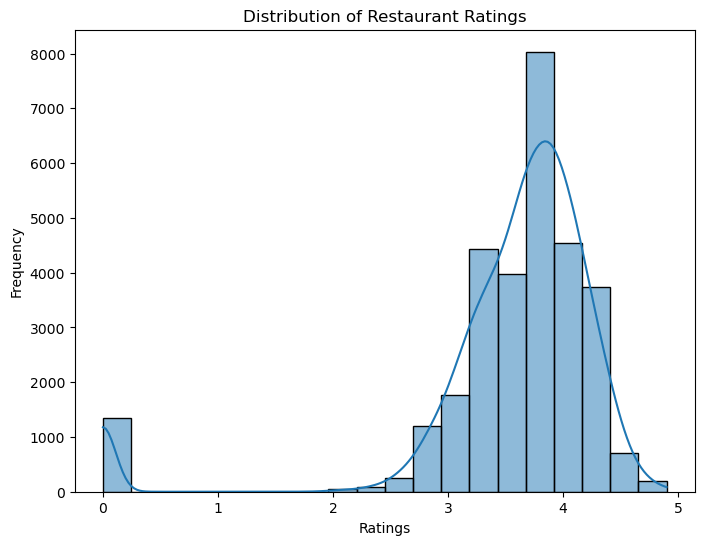

In [83]:
plt.figure(figsize=(8, 6))
sns.histplot(data['rating'], bins=20, kde=True)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')
plt.show()


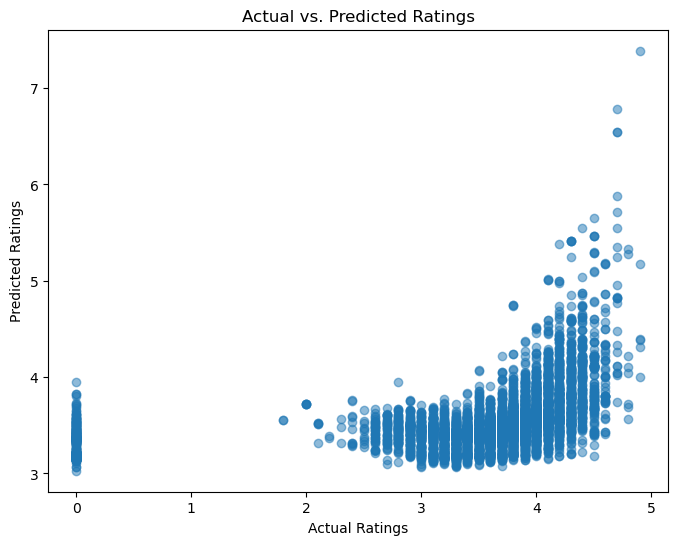

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()


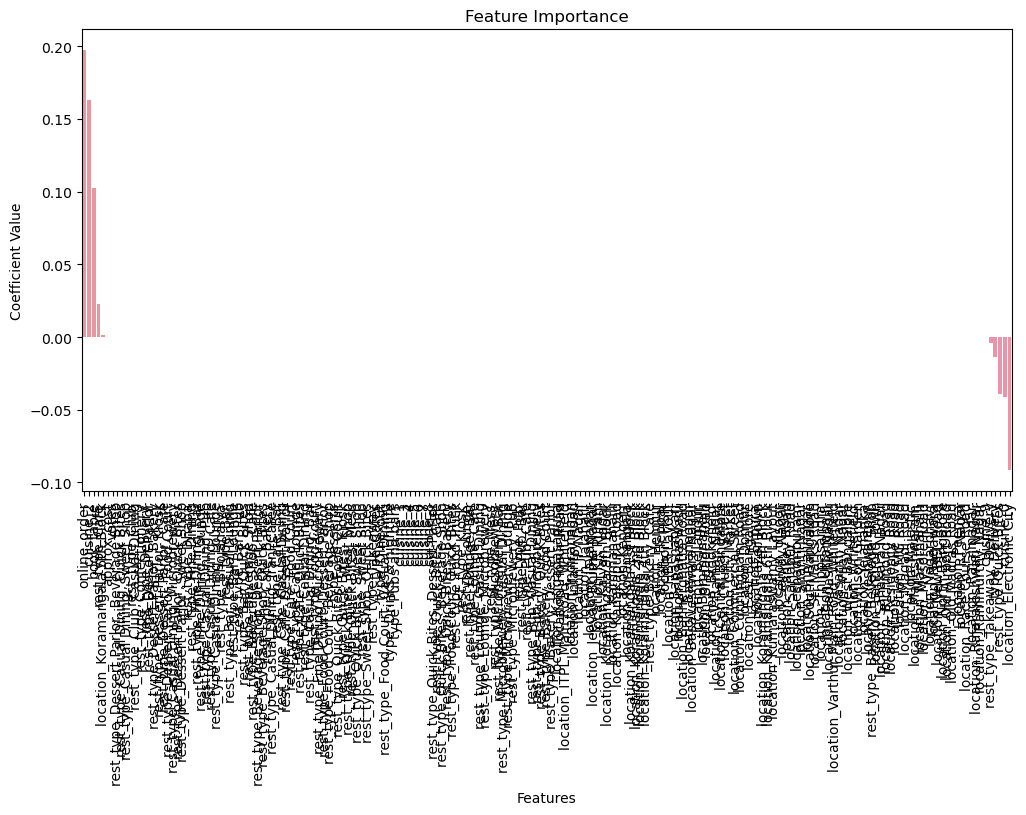

In [85]:
coefficients = pd.Series(model.coef_, index=X.columns)
sorted_coefficients = coefficients.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_coefficients.index, y=sorted_coefficients.values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()


In [86]:
print(data.columns)


Index(['online_order', 'book_table', 'rating', 'votes', 'approx_cost',
       'location_Banashankari', 'location_Banaswadi',
       'location_Bannerghatta Road', 'location_Basavanagudi',
       'location_Basaveshwara Nagar',
       ...
       'cuisine_0', 'cuisine_1', 'cuisine_2', 'cuisine_3', 'cuisine_4',
       'cuisine_5', 'cuisine_6', 'cuisine_7', 'cuisine_8', 'cuisine_9'],
      dtype='object', length=198)


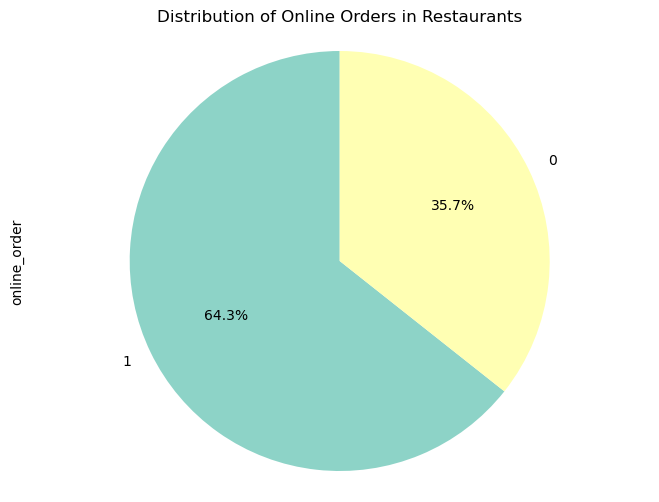

In [87]:
import matplotlib.pyplot as plt

data_pie = data.copy()
data_pie['online_order'].fillna('Unknown', inplace=True)

plt.figure(figsize=(8, 6))
data_pie['online_order'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3'), startangle=90)
plt.title('Distribution of Online Orders in Restaurants')
plt.axis('equal')
plt.show()


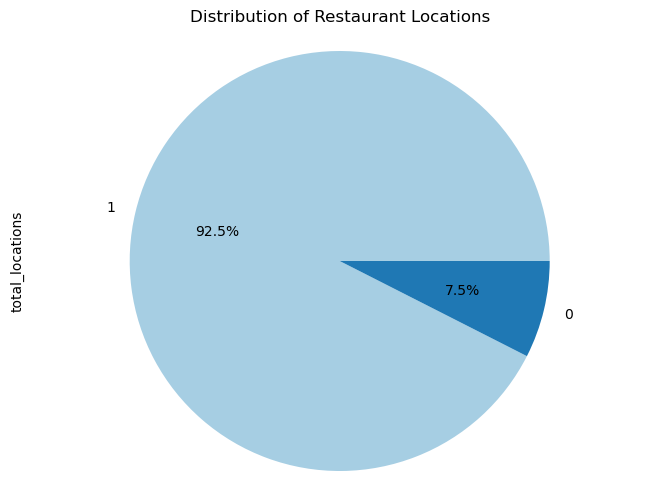

In [88]:
import matplotlib.pyplot as plt
data_pie = data.copy()
data_pie['total_locations'] = data_pie.filter(like='location_').sum(axis=1)

plt.figure(figsize=(8, 6))
data_pie['total_locations'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Distribution of Restaurant Locations')
plt.axis('equal')
plt.show()


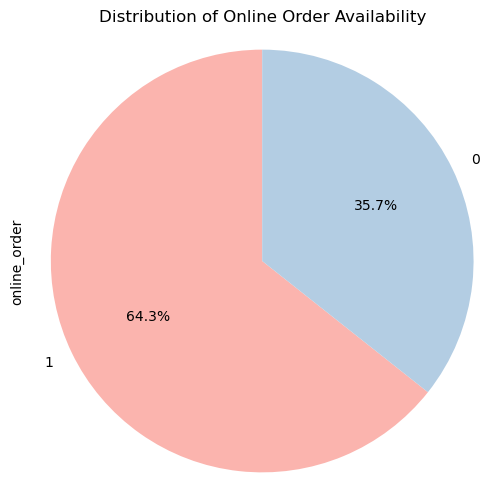

In [89]:
plt.figure(figsize=(6, 6))
data['online_order'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Pastel1'), startangle=90)
plt.title('Distribution of Online Order Availability')
plt.axis('equal')
plt.show()


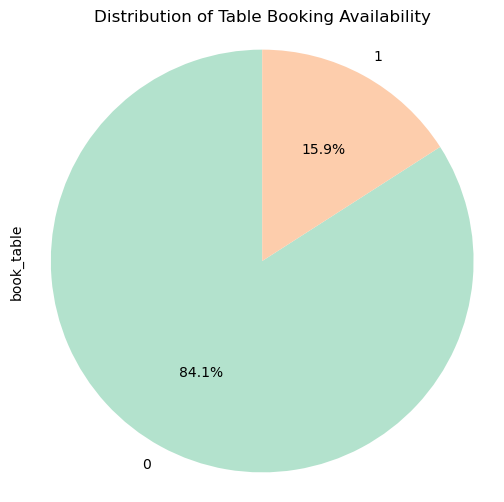

In [90]:
plt.figure(figsize=(6, 6))
data['book_table'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Pastel2'), startangle=90)
plt.title('Distribution of Table Booking Availability')
plt.axis('equal')
plt.show()


                          Location  Count
26            location_Indiranagar   1577
87             location_Whitefield   1571
21                    location_HSR   1561
43  location_Koramangala 5th Block   1461
54           location_Marathahalli   1394
..                             ...    ...
86         location_West Bangalore      5
89              location_Yelahanka      4
66   location_Rajarajeshwari Nagar      2
62                 location_Peenya      1
56             location_Nagarbhavi      1

[91 rows x 2 columns]


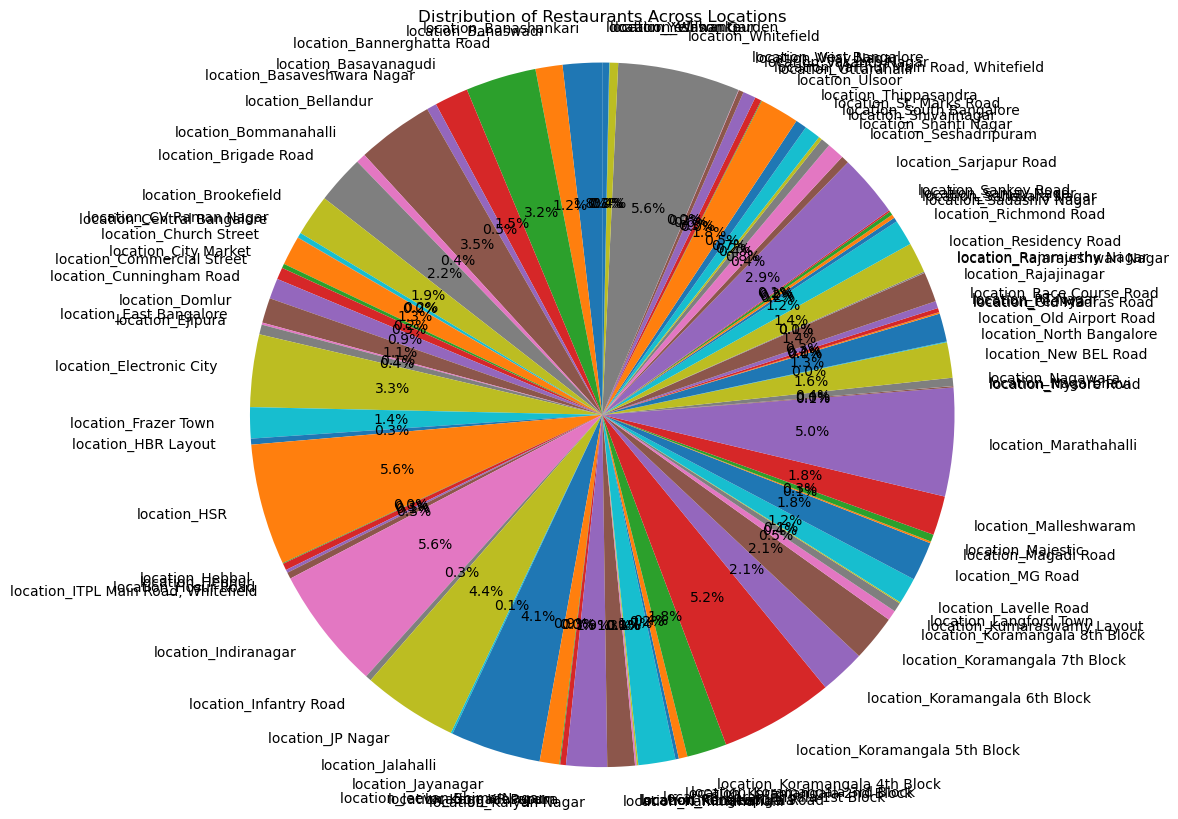

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

location_counts = data[data.columns[data.columns.str.startswith('location_')]].sum()
location_table = pd.DataFrame({'Location': location_counts.index, 'Count': location_counts.values})
location_table = location_table.sort_values(by='Count', ascending=False)

print(location_table)

plt.figure(figsize=(10, 10))
location_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Restaurants Across Locations')
plt.axis('equal')
plt.show()
